<div style="background-color: rgb(230, 216, 173); padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 20px; color: #0a0a0a;">
        <span style="color: Black;">Neel Adalja</span> <br>
        <span style="font-family: 'Arial', sans-serif; font-size: 12px; color: #0a0a0a;">Data Scientist | Data Analyst</span>
    </div>
</div>

<div style="background-color:hsl(184, 33.00%, 56.10%); padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Hosuing Price Modeling and prediction(with outliers) <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">Python | Pandas | Numpy | Scikit-learn | Machine Learning</h3>
</div>

In [1]:
import csv
import pandas as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


In [ ]:
# Reading the CSV file with outliers
df = pd.read_csv('./housing_with_outliers.csv')
df.head()

,Lot Area,Neighborhood,Bldg Type,House Style,Year Built,Year Remod/Add,Full Bath,Bedroom AbvGr,SalePrice
0,31770,NAmes,Single-Family,1,1960,1960,1,3,215000
1,11622,NAmes,Single-Family,1,1961,1961,1,2,105000
2,14267,NAmes,Single-Family,1,1958,1958,1,3,172000
3,11160,NAmes,Single-Family,1,1968,1968,2,3,244000
4,13830,Gilbert,Single-Family,2,1997,1998,2,3,189900


In [3]:
# pringing the names of the neighborhood columns
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [ ]:
# creating dummies with 1-hot-encoding to categorize the input for modeling  
dummies = pd.get_dummies(df['Neighborhood'])
df.columns = df.columns.str.replace(' ', '')
dummies.head(5)

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# creating the dummiess for the buildingtype also
df['BldgType'].unique()
dummies_1 = pd.get_dummies(df['BldgType'])

In [6]:
# dropping 1 column to avoid dummies variable trap we should have 1 less column.
df1 = pd.concat([df, dummies.drop('Veenker', axis='columns'),dummies_1], axis='columns')
df1.head(3)

,LotArea,Neighborhood,BldgType,HouseStyle,YearBuilt,YearRemod/Add,FullBath,BedroomAbvGr,SalePrice,Blmngtn,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Multi-Family,Single-Family,Townhouse
0,31770,NAmes,Single-Family,1,1960,1960,1,3,215000,0,...,0,0,0,0,0,0,0,0,1,0
1,11622,NAmes,Single-Family,1,1961,1961,1,2,105000,0,...,0,0,0,0,0,0,0,0,1,0
2,14267,NAmes,Single-Family,1,1958,1958,1,3,172000,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#dropping the columns that now have encoded columns
df2 = df1.drop(['Neighborhood','BldgType'], axis='columns')
df2.head(3)


,LotArea,HouseStyle,YearBuilt,YearRemod/Add,FullBath,BedroomAbvGr,SalePrice,Blmngtn,Blueste,BrDale,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Multi-Family,Single-Family,Townhouse
0,31770,1,1960,1960,1,3,215000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11622,1,1961,1961,1,2,105000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14267,1,1958,1958,1,3,172000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [29]:
df2.columns = df2.columns.str.replace(' ', '_')
print(df2.columns)  # Confirm changes

Index(['LotArea', 'HouseStyle', 'YearBuilt', 'YearRemod/Add', 'FullBath',
       'BedroomAbvGr', 'SalePrice', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide',
       'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens',
       'GrnHill', 'IDOTRR', 'Landmrk', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer',
       'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Multi-Family',
       'Single-Family', 'Townhouse'],
      dtype='object')


In [51]:
# creating features
X = df2.drop('SalePrice', axis='columns')
X.head(3)

,LotArea,HouseStyle,YearBuilt,YearRemod/Add,FullBath,BedroomAbvGr,Blmngtn,Blueste,BrDale,BrkSide,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Multi-Family,Single-Family,Townhouse
0,31770,1,1960,1960,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11622,1,1961,1961,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,14267,1,1958,1958,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
# Sales Price is out target variable. 
y = df2['SalePrice']
y.head(3)

0    215000
1    105000
2    172000
Name: SalePrice, dtype: int64

In [53]:
# splitting the dataset into test 20% and train 80%.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [66]:
# suing liner regression model 
Model = LinearRegression()
Model.fit(X_train, y_train)
Model.score(X_test, y_test)

0.6784388755832471

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# using the cross validation to see if the random split of test is redicting what values. 
cv = ShuffleSplit(n_splits =5, test_size = 0.2, random_state=20)
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.69046582, 0.70214383, 0.67463627, 0.71050045, 0.68658787])

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#model Predictions. 
y_predicted = Model.predict(X)
y_predicted

array([163307.4551946 , 135357.25337103, 138459.23238597, ...,
       167309.0132194 , 137002.88581659, 199685.16360205])

In [57]:
#MEan Absoloute Error value 
mae = mean_absolute_error(y, y_predicted)
mae

28889.877781444084

In [58]:
#Root mean square error. 
rmse = mean_squared_error(y, y_predicted, squared=False)
rmse

43416.40959554636

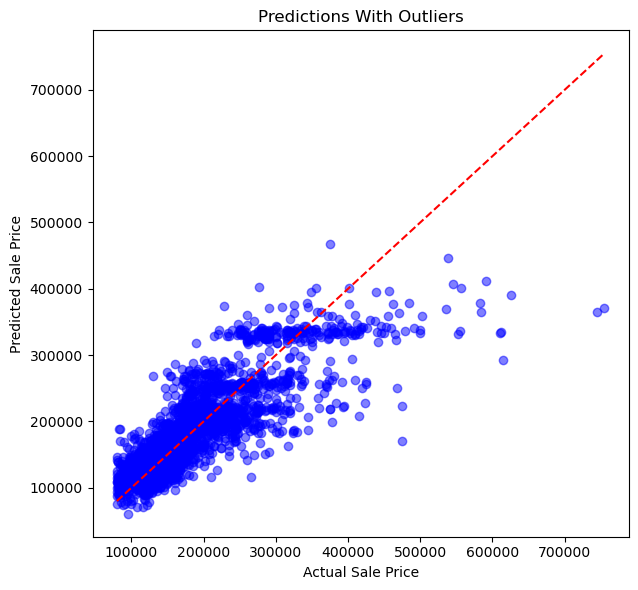

In [59]:
import matplotlib.pyplot as plt
# Ploting the predictions vs actual values for both datasets
plt.figure(figsize=(12, 6))

# Predictions without outliers
plt.subplot(1, 2, 1)
plt.scatter(y, y_predicted, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Predictions With Outliers')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.tight_layout()
plt.show()
# the predictions has outliers. 

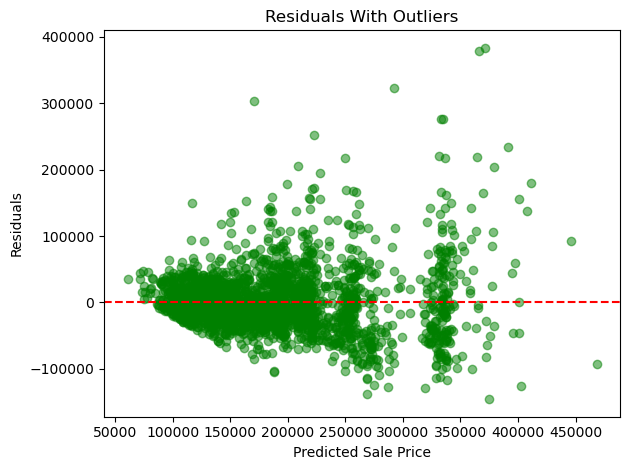

In [60]:
residuals_with_outliers = y - y_predicted

# Reidual scatrerplot shows that the data is following a pattern here. 
plt.subplot(1, 1, 1)
plt.scatter(y_predicted, residuals_with_outliers, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals With Outliers')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

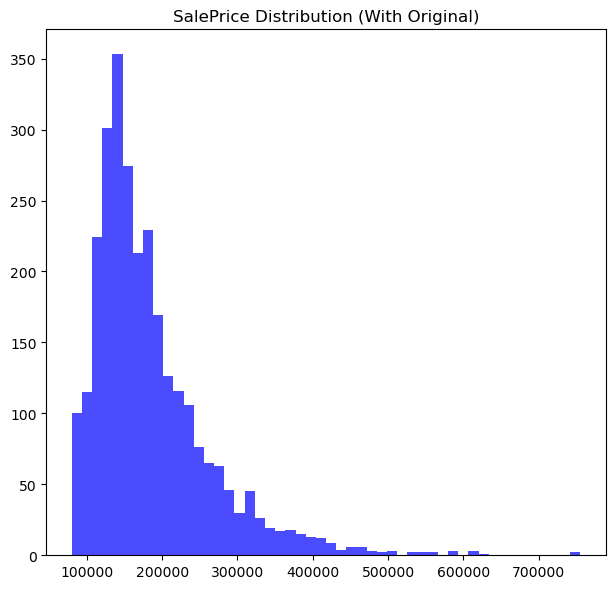

In [61]:
plt.figure(figsize=(12, 6))
#shows our data distribution. 
plt.subplot(1, 2, 1)
plt.hist(df2['SalePrice'], bins=50, color='blue', alpha=0.7)
plt.title('SalePrice Distribution (With Original)')

plt.tight_layout()
plt.show()

In [62]:
def predict_price(LotArea, FullBath, BedroomAbvGr):
    # Create a dictionary for the input values
    input_data = {
        'LotArea': [LotArea],
        'FullBath': [FullBath],
        'BedroomAbvGr': [BedroomAbvGr]
    }

    # Add other features as zeros or defaults if necessary
    # For one-hot encoded columns, set all categories to 0 initially

    # Convert to a DataFrame
    input_df = pd.DataFrame(input_data)

    # Ensure the DataFrame matches the trained model's feature order
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Make the prediction using the trained model
    predicted_price = Model.predict(input_df)[0]  # Use your trained model
    return predicted_price

# Example usage
#predicted_price = 
predict_price(11622, 1, 2)
#print(f"The predicted price for the given inputs is: ${predicted_price}")

-2219740.077633455

In [64]:
#using Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#using decision tree model. 
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Decision Tree R2 Score: {dt_r2}")

Decision Tree RMSE: 58037.04615866906
Decision Tree R2 Score: 0.4976128348563966


Random Forest RMSE: 43902.330917834624
Random Forest R2 Score: 0.7125230077154195


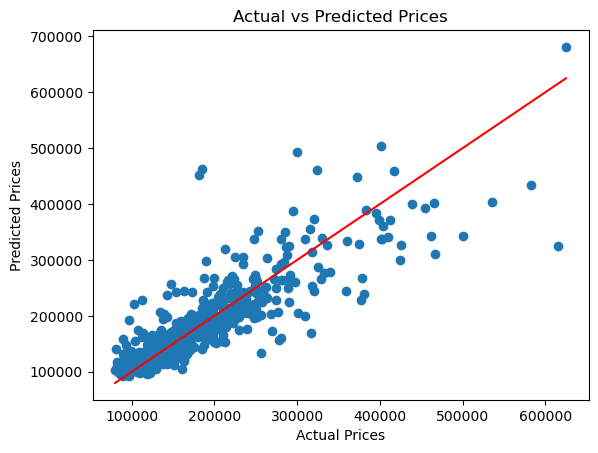

In [65]:
# Using Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R2 Score: {rf_r2}")

#using random forrest and the plot shows the value its predicting. 
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test) 

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line of perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()